In [1]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [2]:
df =  pd.read_csv("aml_train.csv")

print(len(df))

2265


In [3]:
df.head(-3)

,step,paytype,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.00,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.00,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.00,C137533655,20128.0,0.00,C1848415041,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2257,1,PAYMENT,5880.33,C1264754451,11593.0,5712.67,M1888639813,0.0,0.0,0,0
2258,1,PAYMENT,14025.72,C463381475,20309.0,6283.28,M178401052,0.0,0.0,0,0
2259,1,PAYMENT,12187.88,C1441243996,22472.0,10284.12,M936219350,0.0,0.0,0,0
2260,1,PAYMENT,10777.89,C1495445111,105804.0,95026.11,M1113829504,0.0,0.0,0,0


In [4]:
# df.info()

In [5]:
df=df.dropna()

In [6]:
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


In [7]:
'''removing the unwanted features'''
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)
df.head(-3)

,step,paytype,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
1,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
2,1,TRANSFER,2806.00,2806.0,0.00,0.0,0.0,1
3,1,CASH_OUT,2806.00,2806.0,0.00,26202.0,0.0,1
4,1,TRANSFER,20128.00,20128.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...
2257,1,PAYMENT,5880.33,11593.0,5712.67,0.0,0.0,0
2258,1,PAYMENT,14025.72,20309.0,6283.28,0.0,0.0,0
2259,1,PAYMENT,12187.88,22472.0,10284.12,0.0,0.0,0
2260,1,PAYMENT,10777.89,105804.0,95026.11,0.0,0.0,0


In [8]:
''' Visualising the variables by grouping them by class '''
# df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

' Visualising the variables by grouping them by class '

In [9]:
''' co-relation matrix to check multicolinearity between variables '''

# correlation = df.corr()
# plt.figure(figsize=(15,15))
# plt.title('Correlation Matrix')
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

' co-relation matrix to check multicolinearity between variables '

In [10]:
#creating dummy variables for categorical values
# dum = pd.get_dummies(df['type'])
# df1 = pd.concat([df,dum],axis=1)
# df1.drop(['type'],axis=1, inplace=True)

# df2=df1

isFraud
0    1133
1    1132
Name: count, dtype: int64


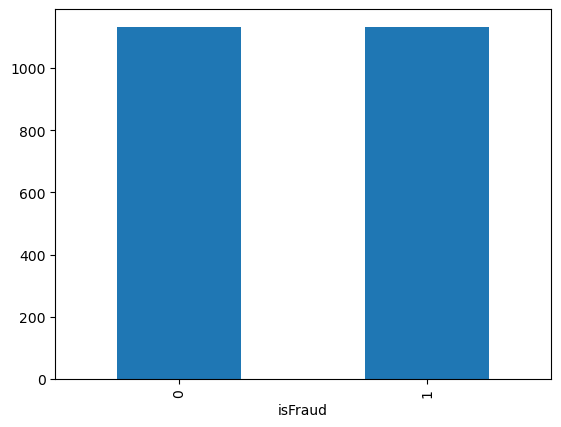

In [11]:
'''checking if target class is balanced or not'''

# df = df.sample()
# print(df.head(-3))
df.isFraud.value_counts().plot.bar()
print(df.isFraud.value_counts())

In [12]:


'''Splitting the data into training and test'''

X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1), df['isFraud'], test_size=0.3, random_state=0)

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# '''resampling the training data'''

# sm = SMOTE(random_state=10, sampling_strategy=0.5)
# x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [13]:
print(df.head())

   step   paytype   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  TRANSFER    181.0          181.0             0.0             0.0   
1     1  CASH_OUT    181.0          181.0             0.0         21182.0   
2     1  TRANSFER   2806.0         2806.0             0.0             0.0   
3     1  CASH_OUT   2806.0         2806.0             0.0         26202.0   
4     1  TRANSFER  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  
0             0.0        1  
1             0.0        1  
2             0.0        1  
3             0.0        1  
4             0.0        1  


In [14]:
# print(len(df2))

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

''' Feature scaling '''

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train_scaled = sc.fit_transform(X_train)
# x_test_scaled = sc.transform(X_test)



' Feature scaling '

In [18]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming 'payment' is a categorical column in your DataFrame
type_data = df['paytype']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the payment data
type_encoded = label_encoder.fit_transform(type_data)

# Replace the original 'payment' column with the encoded values
df['type_encoded'] = type_encoded
# import joblib
# joblib.dump(type_encoded, 'type_encoded.pkl')

with open('type_encoded.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [19]:
# label_encoder.transform

In [20]:
df.drop('paytype',axis=1,inplace=True)

In [21]:
df.drop('step',axis=1,inplace=True)
print(df.describe())
print(df.info())

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  2.265000e+03   2.265000e+03    2.265000e+03    2.265000e+03   
mean   6.535577e+05   1.004387e+06    4.178069e+05    5.412953e+05   
std    1.549272e+06   2.119104e+06    1.518946e+06    1.864512e+06   
min    8.730000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    9.131000e+03   1.025600e+04    0.000000e+00    0.000000e+00   
50%    1.066733e+05   8.571900e+04    0.000000e+00    0.000000e+00   
75%    4.351667e+05   8.100392e+05    9.045190e+03    2.572745e+05   
max    1.000000e+07   1.990000e+07    9.987287e+06    3.300000e+07   

       newbalanceDest      isFraud  type_encoded  
count    2.265000e+03  2265.000000   2265.000000  
mean     1.103347e+06     0.499779      2.295806  
std      2.906975e+06     0.500110      1.414184  
min      0.000000e+00     0.000000      0.000000  
25%      0.000000e+00     0.000000      1.000000  
50%      0.000000e+00     0.000000      3.000000  
75%      8.4

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1), df['isFraud'], test_size=0.3, random_state=0)

In [23]:
''' Initializing the model '''

model = Sequential()

''' Adding the input layer and the first hidden layer '''
model.add(Dense(units=64, activation='relu', input_shape=(6,)))
# model.add(Dense(input_dim=11, output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the second hidden layer '''
model.add(Dense(units=10, activation='relu'))

# model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the output layer '''
model.add(Dense(units=1, activation='sigmoid'))

# model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [26]:
''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 2)
history = model.fit(X_train, y_train, batch_size = 10, epochs = 2)


Epoch 1/2


159/159 [==============================] - 4s 5ms/step - loss: 7494.8491 - accuracy: 0.8107
Epoch 2/2
159/159 [==============================] - 1s 5ms/step - loss: 829.1024 - accuracy: 0.8707


In [27]:
# Save the model to a file
model.save('my_model.h5')

In [28]:
history.history

{'loss': [7494.84912109375, 829.1023559570312],
 'accuracy': [0.8107255697250366, 0.8706624507904053]}

In [29]:
# evaluate the keras model- training accuracy
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

50/50 [==============================] - 1s 4ms/step - loss: 2816.2671 - accuracy: 0.8353
Accuracy: 83.53


In [30]:
# evaluate the keras model -testing accuraccy
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

22/22 [==============================] - 0s 5ms/step - loss: 3682.2073 - accuracy: 0.8324
Accuracy: 83.24


In [31]:
predictions = model.predict(X_test)
print(len(X_test))
# Print the predictions
print(predictions[0])

22/22 [==============================] - 0s 5ms/step
680
[1.]


In [32]:
# df.head(-3)

In [33]:
#Testing

In [36]:
test_data = pd.read_csv('aml_test.csv')
test_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,5170.23,184781,179610.77,0,0,0,3
1,8553.73,69404,60850.27,0,0,0,3
2,11982.62,22386,10403.38,0,0,0,3


In [39]:
#test_data.drop('step',axis=1,inplace=True)
#test_data.drop('nameOrig',axis=1,inplace=True)
#test_data.drop('nameDest',axis=1,inplace=True)
#test_data.drop('isFlaggedFraud',axis=1,inplace=True)
#test_data.head(-3)

In [40]:
import pickle

label_encoder = None
# label_encoder = joblib.load('type_encoded.pkl')
with open('type_encoded.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [41]:
# label_encoder

In [43]:
##encode paytype


# print(type(test_data['paytype']))
# test_data['type_encoded'] = label_encoder.transform(test_data['paytype'])
test_data['type_encoded'] = label_encoder.transform(test_data['paytype'])

#Drop the original 'type' column if needed
test_data.drop(columns=['paytype'], inplace=True)

# Display the updated DataFrame
print(test_data.head())

KeyError: 'paytype'

In [116]:
# import pandas as pd
from keras.models import load_model


# Load the trained model
model = load_model('my_model.h5')

# Load the test data (assuming it has column headers)
# test_data = pd.read_csv('aml_test.csv')

# Remove the 'isFraud' column from features
test_data_features = test_data.drop(columns=['isFraud'])

# Iterate through each row in the test data
wrongConter = 0
totalPreds = 0
for index, row in test_data_features.iterrows():
    # Extract features from the row
    features = row.values.reshape(1, -1)
    totalPreds = totalPreds +1
    # Make predictions
    predictions = model.predict(features)

    # Print the actual and predicted results
    print("Actual:", test_data.at[index, 'isFraud'])  # assuming 'isFraud' is the target column
    print("Predicted:", predictions)
    if int(test_data.at[index, 'isFraud']) !=int(predictions[0][0]):
      wrongConter = wrongConter + 1
print("Total Wrong predictions >>",wrongConter)
print("Total predictions >>",totalPreds,">>>>>>>>>>>>>>>>", float(wrongConter/totalPreds)*100  ,"%")


1/1 [==============================] - 0s 25ms/step
Total Wrong predictions >> 4
Total predictions >> 21 >>>>>>>>>>>>>>>> 19.047619047619047 %


In [117]:
###-------Random Forest

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [122]:
# Initialize and train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

with open('clf_rf.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [124]:
# Make predictions
with open('clf_rf.pkl', 'rb') as f:
    my_clf = pickle.load(f)
y_pred = my_clf.predict(X_test)

print(y_pred[0])

1


In [132]:
test_data_features = test_data.drop(columns=['isFraud'])
print(len(test_data))
test_data.head(-3)

21


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,363378.75,363378.75,0.00,0.00,0.00,1,4
1,363378.75,363378.75,0.00,3609871.44,3973250.18,1,1
2,655676.97,655676.97,0.00,0.00,0.00,1,4
3,655676.97,655676.97,0.00,53614.28,709291.25,1,1
4,56745.14,56745.14,0.00,0.00,0.00,1,4
5,56745.14,56745.14,0.00,51433.88,108179.02,1,1
6,33676.59,33676.59,0.00,0.00,0.00,1,4
7,33676.59,33676.59,0.00,0.00,33676.59,1,1
8,87999.25,87999.25,0.00,0.00,0.00,1,4
9,87999.25,87999.25,0.00,0.00,87999.25,1,1


In [135]:

# Iterate through each row in the test data
wrongConter = 0
totalPreds = 0
for index, row in test_data_features.iterrows():
    # Extract features from the row
    features = row.values.reshape(1, -1)
    totalPreds = totalPreds +1
    # Make predictions
    predictions = my_clf.predict(features)

  #  # Print the actual and predicted results
  #   print("Actual:", test_data.at[index, 'isFraud'])  # assuming 'isFraud' is the target column
  #   print("Predicted:", predictions)
    if int(test_data.at[index, 'isFraud']) !=int(predictions[0]):
      wrongConter = wrongConter + 1
print("Total Wrong predictions >>",wrongConter)
print("Total predictions >>",totalPreds,">>>>>>>>>>>>>>>>", float(wrongConter/totalPreds)*100  ,"%")

Total Wrong predictions >> 0
Total predictions >> 21 >>>>>>>>>>>>>>>> 0.0 %


In [121]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.986764705882353
Confusion Matrix:
 [[332   6]
 [  3 339]]


In [55]:
# from sklearn.metrics import accuracy_score

# # Assuming you have ground truth labels y_test and predicted labels y_pred

# # Convert predicted probabilities to class labels
# y_pred_classes = (predictions > 0.5).astype('int')  # Assuming binary classification with a threshold of 0.5

# # Compute accuracy
# accuracy = accuracy_score(y_test, y_pred_classes)
# # Print accuracy
# print("Accuracy:", accuracy*100)

Accuracy: 74.11764705882354


Using Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('paysim.csv')


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
'''removing the unwanted features'''
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('isFlaggedFraud', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'payment' is a categorical column in your DataFrame
type_data = data['type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the payment data
type_encoded = label_encoder.fit_transform(type_data)

# Replace the original 'payment' column with the encoded values
data['type_encoded'] = type_encoded


In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,3
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,3
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,4
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,3


In [ ]:
'''Checking for any null values'''
print('Null Values =',data.isnull().values.any())

Null Values = True


In [ ]:
data=data.dropna()
'''Checking for any null values'''
print('Null Values =',data.isnull().values.any())

Null Values = False


In [ ]:
type_removed=data.drop('type',axis=1)

In [ ]:

# Preprocess data
# Feature engineering, data cleaning, normalization, etc.

# Split data into features and labels
X = type_removed.drop('isFraud', axis=1)
y = data['isFraud']
print(X)

         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1    9839.64      170136.00       160296.36            0.00   
1           1    1864.28       21249.00        19384.72            0.00   
2           1     181.00         181.00            0.00            0.00   
3           1     181.00         181.00            0.00        21182.00   
4           1   11668.14       41554.00        29885.86            0.00   
...       ...        ...            ...             ...             ...   
1954402   178  157456.39      670785.40       828241.79       790406.55   
1954403   178   97109.60      828241.79       925351.39       134349.26   
1954404   178   20977.17      925351.39       946328.56       185015.65   
1954405   178    3007.13      946328.56       949335.69       217247.59   
1954406   178  107636.36      949335.69      1056972.05       814552.48   

         newbalanceDest  type_encoded  
0                  0.00             3  
1                  

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize and train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9997339350494523
Confusion Matrix:
 [[390476      3]
 [   101    302]]


In [ ]:
from joblib import dump

# Assuming 'model' is your trained model object
# Save the model to a file
dump(model, 'rf_trained_model.joblib')


['rf_trained_model.joblib']